# Posttest 6
## Nama : Sancto Metano Crozart
## Nim : 2109106112

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt

# membaca dataset

In [32]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Atribut X dan Y

In [33]:
X = df[['Age', 'Clothing ID']]
y = df['Rating']

## Split dataset train dan set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Melakukan Preprocessing dengan Normalisasi

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membangun model Dengan Sequential

In [36]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
    ])

## Compile model

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Melatih Model

In [38]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
529/529 [==============================] - 4s 5ms/step - loss: -1255.3329 - accuracy: 0.0368 - val_loss: -5119.2905 - val_accuracy: 0.0357
Epoch 2/50
529/529 [==============================] - 2s 4ms/step - loss: -18448.8496 - accuracy: 0.0368 - val_loss: -38628.2656 - val_accuracy: 0.0357
Epoch 3/50
529/529 [==============================] - 2s 4ms/step - loss: -73747.2344 - accuracy: 0.0368 - val_loss: -118689.7734 - val_accuracy: 0.0357
Epoch 4/50
529/529 [==============================] - 2s 4ms/step - loss: -180794.2344 - accuracy: 0.0368 - val_loss: -255303.0781 - val_accuracy: 0.0357
Epoch 5/50
529/529 [==============================] - 2s 4ms/step - loss: -347866.0312 - accuracy: 0.0368 - val_loss: -455621.6562 - val_accuracy: 0.0357
Epoch 6/50
529/529 [==============================] - 2s 4ms/step - loss: -580429.0625 - accuracy: 0.0368 - val_loss: -723756.2500 - val_accuracy: 0.0357
Epoch 7/50
529/529 [==============================] - 2s 4ms/step - loss: -882605.9

## model accuracy

In [39]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
accuracy = accuracy_score(y_test, y_pred)

147/147 [==============================] - 1s 3ms/step


## Grafik Akurasi

Text(0.5, 1.0, 'Grafik Akurasi')

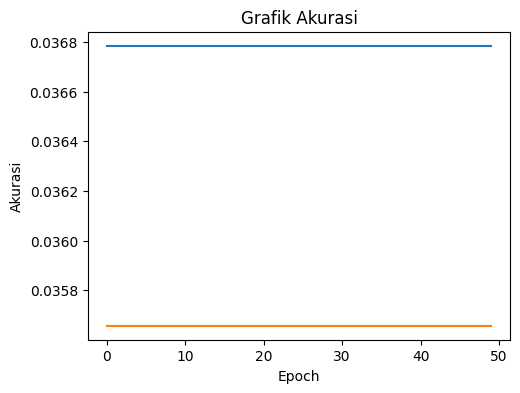

In [40]:
# Membuat grafik pergerakan metrik (akurasi dan loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi')

## Grafik Loss

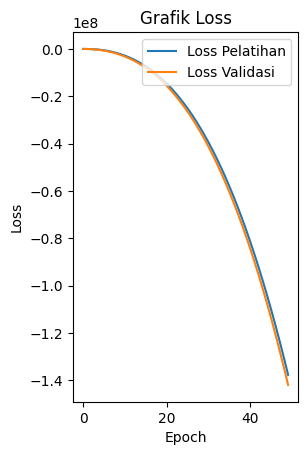

In [41]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()

In [42]:
print("Akurasi model pada test set",accuracy)

Akurasi model pada test set 0.032567049808429116
